# OpenCV Face Detection Webcam

In this notebook, opencv face detection will be applied to webcam images.

To run all cells in this notebook a webcam and HDMI output monitor are required.  

References:

https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

### Step 1: Load the overlay

In [11]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
base = BaseOverlay("base.bit")

### Step 2: Initialize Webcam and HDMI Out

In [12]:
# monitor configuration: 640*480 @ 60Hz
Mode = VideoMode(640,480,24)
hdmi_out = base.video.hdmi_out
hdmi_out.configure(Mode,PIXEL_BGR)
hdmi_out.start()

In [13]:
# monitor (output) frame buffer size
frame_out_w = 1920
frame_out_h = 1080
# camera (input) configuration
frame_in_w = 640
frame_in_h = 480

In [14]:
# initialize camera from OpenCV
import cv2

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);

print("Capture device is open: " + str(videoIn.isOpened()))

Capture device is open: True


### Step 3: Show input frame on HDMI output

In [15]:
# Capture webcam image
import numpy as np

ret, frame_vga = videoIn.read()

# Display webcam image via HDMI Out
if (ret):      
    outframe = hdmi_out.newframe()
    outframe[0:480,0:640,:] = frame_vga[0:480,0:640,:]
    hdmi_out.writeframe(outframe)
else:
    raise RuntimeError("Failed to read from camera.")

### Step 4: Now use matplotlib to show image inside notebook

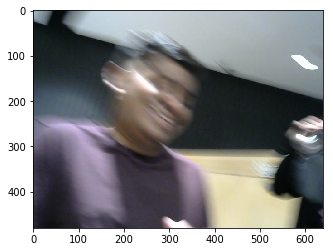

In [16]:
# Output webcam image as JPEG
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(frame_vga[:,:,[2,1,0]])
plt.show()

### Step 5: Apply the face detection to the input

In [17]:
import cv2

np_frame = frame_vga

face_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_eye.xml')

gray = cv2.cvtColor(np_frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(np_frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = np_frame[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

### Step 6: Show results on HDMI output

In [18]:
# Output OpenCV results via HDMI
outframe[0:480,0:640,:] = frame_vga[0:480,0:640,:]
hdmi_out.writeframe(outframe)

### Step 7: Now use matplotlib to show image inside notebook

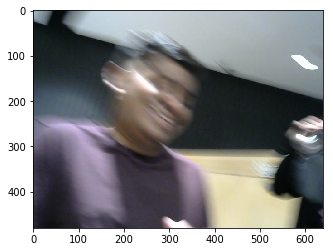

In [19]:
# Output OpenCV results via matplotlib
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(np_frame[:,:,[2,1,0]])
plt.show()

### Step 8: Release camera and HDMI

In [20]:
videoIn.release()
hdmi_out.stop()
del hdmi_out